In [1]:
import backtrader as bt
from datetime import datetime
import yfinance as yf

### Load Data

In [2]:
data = bt.feeds.PandasData(dataname=yf.download("GOOG", start=datetime(2019, 1, 1)))

[*********************100%***********************]  1 of 1 completed


### Create Strategy

In [3]:
class MovingAverageStrategy(bt.Strategy):
    
    params = (("period_fast", 30), ("period_slow", 200))
    
    def __init__(self):
        self.close_data = self.data.close
        
        self.fast_sma = bt.indicators.MovingAverageSimple(self.close_data, 
                                                          period=self.params.period_fast)
        self.slow_sma = bt.indicators.MovingAverageSimple(self.close_data,
                                                         period=self.params.period_slow)
    
    def next(self):
        if not self.position:
            if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] < self.slow_sma[-1]:
                print("buy")
                self.buy()
            elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] > self.slow_sma[-1]:
                print("close")
                self.close()

In [4]:
cerebro = bt.Cerebro()

cerebro.broker.set_cash(1_200)
cerebro.broker.setcommission(0.01)

cerebro.adddata(data)
cerebro.addstrategy(MovingAverageStrategy)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)

In [5]:
result = cerebro.run()

close
buy


In [6]:
result[0].analyzers.sharperatio.get_analysis()

OrderedDict([('sharperatio', 0.30841987110313557)])

In [7]:
result[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', 0.04512205459944812),
             ('ravg', 4.068715473349695e-05),
             ('rnorm', 0.010305906777934106),
             ('rnorm100', 1.0305906777934106)])

In [8]:
cerebro.broker.getvalue()

1255.3866482543945

<IPython.core.display.Javascript object>


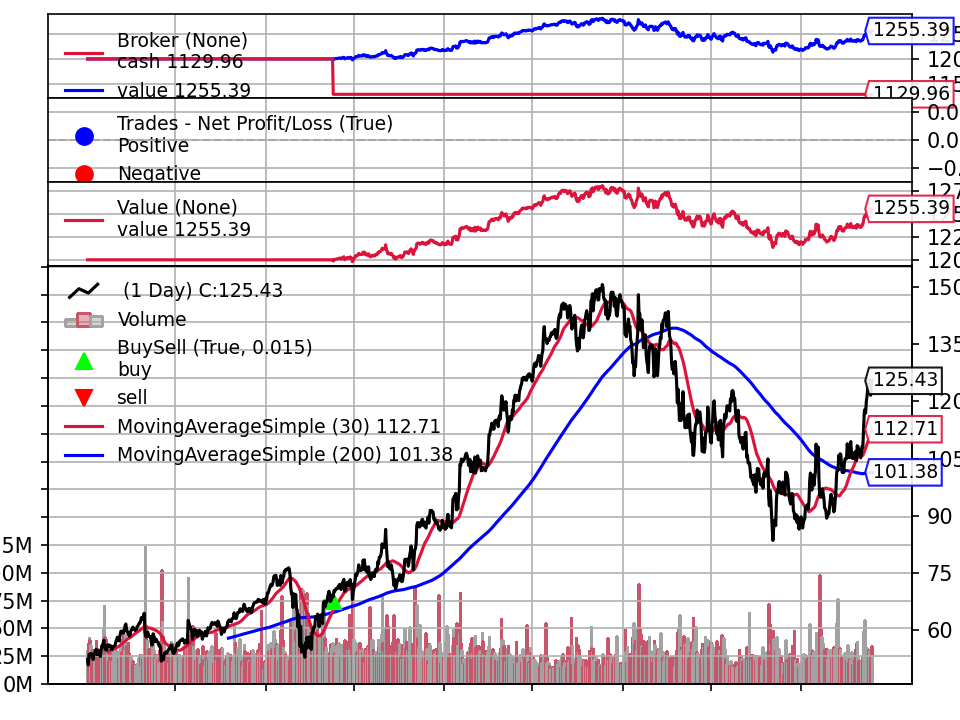

[[<Figure size 640x480 with 5 Axes>]]

In [9]:
cerebro.plot()